In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.count(axis=0) 
df.shape
rows=len(df.index)
print('number of rows in this dataset is :',rows)

number of rows in this dataset is : 119390


In [5]:
print('columns with missing value :',df.columns[df.isnull().any()].tolist())
print()
missing=df.isnull().sum()

print(f'{missing.idxmax()} column has maximum missing value with {missing.max()} missing value')

columns with missing value : ['children', 'country', 'agent', 'company']

company column has maximum missing value with 112593 missing value


# Drop 'company' column from dataset

In [6]:
df.drop('company', inplace=False, axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


<AxesSubplot:xlabel='hotel', ylabel='hotel'>

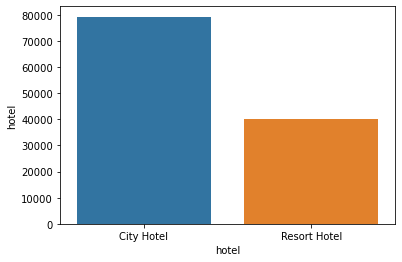

In [42]:
d = df.groupby('hotel')['hotel'].count()
sns.barplot(x=d.index, y=d)

Conclusion - City Hotels are more in number approximately double than the Resort Hotel

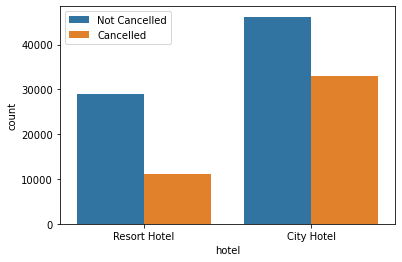

In [43]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['Not Cancelled', 'Cancelled'])

Conclusion - 
In Resort Hotel, the ratio of cancelled vs not cancelled is large when compared to City Hotel

In [44]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

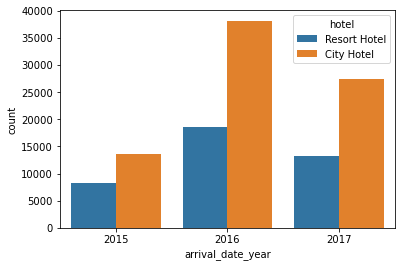

In [45]:
sns.countplot(x='arrival_date_year', hue='hotel', data=df)

# Which countries have most passengers? top 10

In [8]:
df['country'].value_counts()[:10]


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Conclusion - the most passengers are in Portuguese followed by Britain and France .

# Who paid most ‫‪ADR(‫‪Average‬‬ ‫‪Daily‬‬ ‫‪Rate‬‬) and what is her/his name?

In [10]:
max_idr = df['adr'].idxmax()
name = df.iloc[max_idr]['name']
pay = df.iloc[max_idr]['adr']
print(f'{name} paid {pay}')

Daniel Walter paid 5400.0


## What is the Avarage of ADRs?

In [12]:
res = df['adr'].mean()
np.round(res,2)

101.83

## The avarage of nights staying?

In [14]:
df['all_night']= df.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
m = df['all_night'].mean()
np.round(m,2)

3.43

## Name and email of people who had five ‫‪special‬‬ ‫‪request‬‬?

In [16]:
df[df['total_of_special_requests'] == 5][['name','email']]

,name,email
7860,Amanda Harper,Amanda.H66@yahoo.com
11125,Laura Sanders,Sanders_Laura@hotmail.com
14596,Tommy Ortiz,Tommy_O@hotmail.com
14921,Gilbert Miller,Miller.Gilbert@aol.com
14922,Timothy Torres,TTorres@protonmail.com
24630,Jennifer Weaver,Jennifer_W@aol.com
27288,Crystal Horton,Crystal.H@mail.com
27477,Brittney Burke,Burke_Brittney16@att.com
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com
29949,Sarah Floyd,Sarah_F@gmail.com


## The most common surnames

In [18]:

df['last_name'] = df['name'].apply(lambda x : x.split(' ')[1])
df['last_name'].value_counts()

Smith       2510
Johnson     1998
Williams    1628
Jones       1441
Brown       1433
            ... 
Jim            1
Vernon         1
Latoya         1
Kristina       1
Eugene         1
Name: last_name, Length: 1409, dtype: int64

Conclusion - Smith is the most common surname and (Jim ,Vernon,Latoya,Kristina ,Eugene) are the least common surnames

## People with most children and baby that reserved hotel

In [20]:
df['baby_children'] = df.apply(lambda x: x['children'] + x['babies'], axis=1)
df.sort_values( by= ['baby_children'], ascending= False)[['name','baby_children']][:10]

,name,baby_children
328,Jamie Ramirez,10.0
46619,Nicholas Parker,10.0
78656,Marc Robinson,9.0
19718,Mr. Jeffrey Cross,3.0
107837,Albert French,3.0
24409,Lindsay Rodriguez,3.0
90790,Nathaniel Kim,3.0
95227,Nancy Cole,3.0
106216,Krystal Trevino,3.0
27246,Faith Smith,3.0


Conclusion - Jamie Ramirez	Nicholas Parker are the only two with most number of babies 10 childrens with them
             and least childrens are 3 .

## The most area code that reserved hotel

In [22]:
df['phone-number'].apply(lambda x:x[:3]).value_counts()


799    168
185    167
541    166
739    163
763    163
      ... 
896    106
973    105
577    105
818    102
970     97
Name: phone-number, Length: 900, dtype: int64

## Top 10 countries of origin of Hotel visitors

In [24]:
df['country'].value_counts(normalize = True)[:10]


PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

Text(0, 0.5, 'Reservation Count')

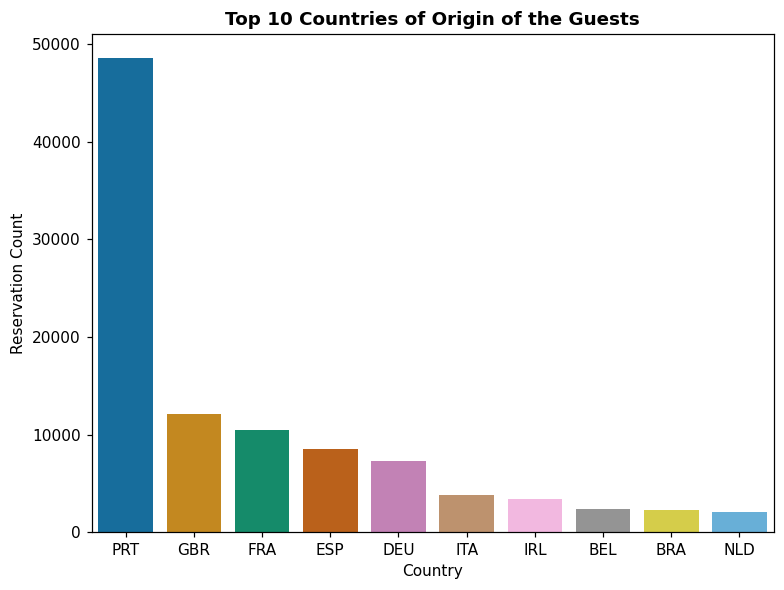

In [25]:
plt.figure(figsize=(8,6), dpi=110)

sns.countplot(data=df, x='country',order=pd.value_counts(df['country']).iloc[:10].index,
              palette='colorblind')

plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

Conclusion- 
Most of bookings are created from Portugal and then Great Britain in second place and France.

## Busiest Month with Bookings 

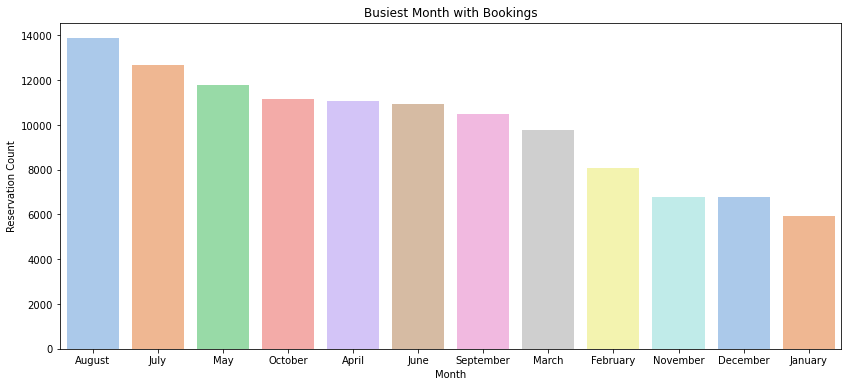

In [26]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(14,6))
sns.countplot(data=df ,x='arrival_date_month', palette='pastel',
              order=pd.value_counts(df['arrival_date_month']).index)

plt.title('Busiest Month with Bookings')
plt.xlabel('Month')
plt.ylabel('Reservation Count')
plt.show()

Conclusion - According to the graph, August is the most occupied (busiest) month and January is the least busiest month of the year.

# How many Bookings were Cancelled at the Hotel?

In [29]:
df['is_canceled'].value_counts(normalize = True)


0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

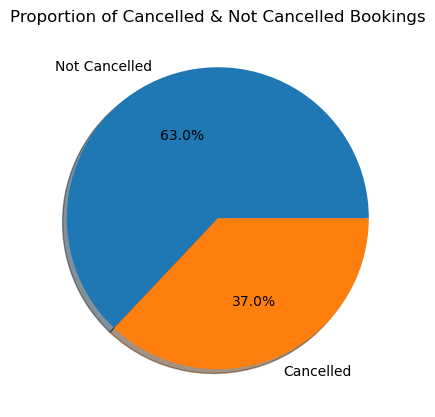

In [30]:
plt.figure(figsize=(7,5), dpi=100)
proportion = df['is_canceled'].value_counts()

labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%')
plt.show()

Conclusion-
The above pie chart depicts proportion or percentage of cancelled & Not cancelled bookings.

## How many Bookings were Cancelled by Hotel Type

In [31]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.615012
             Resort Hotel    0.384988
1            City Hotel      0.748508
             Resort Hotel    0.251492
Name: hotel, dtype: float64

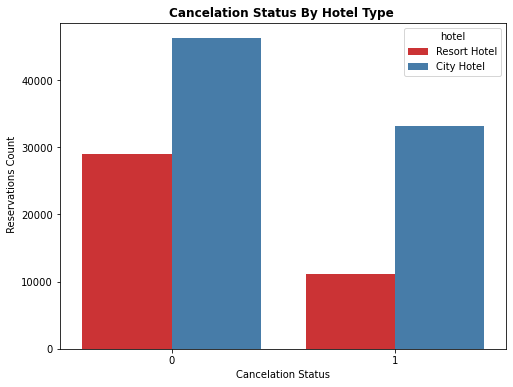

In [32]:
plt.figure(figsize = (8,6))
sns.countplot(x='is_canceled', data = df, hue = 'hotel', palette= 'Set1')

plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()


For the Resort Hotel total of 25.14% Bookings were cancelled, For the City Hotel total of 74.85% Bookings were cancelled

Total Number of Bookings for Each Hotel

In [33]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

Text(0, 0.5, 'Reservation Count')

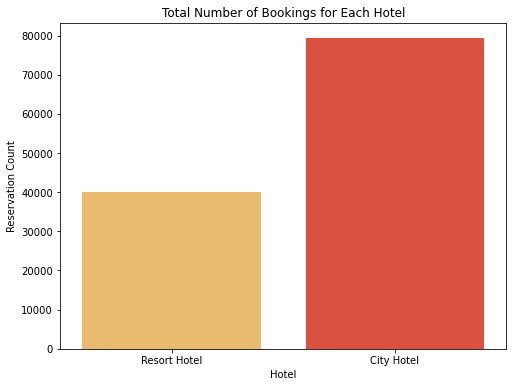

In [34]:
plt.figure(figsize = (8,6))
sns.countplot(x='hotel', data = df, palette='YlOrRd')
plt.title('Total Number of Bookings for Each Hotel')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

The above graph depicts that approximately 34% of the reservations were booked for Resort hotel and 66% were booked for City Hotel.

In [35]:
df['total_of_special_requests'].value_counts(normalize = True)


0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

## Exploring Number of Special Requests

Text(0, 0.5, 'Count')

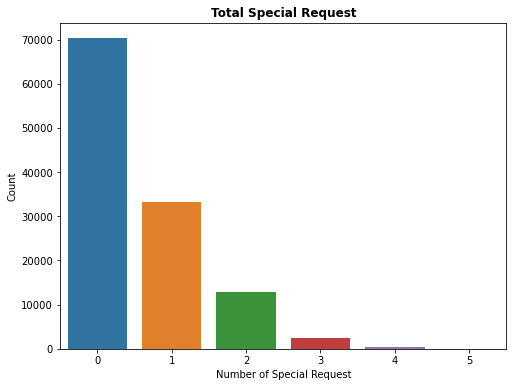

In [36]:
plt.figure(figsize = (8,6))
sns.countplot(data=df, x='total_of_special_requests')

plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')


From the above graph we can depict that around 58.8% bookings do not have any special requests from the guests

## What is the Effect of Deposit Type on Cancellations

In [37]:
df.groupby('meal')['is_canceled'].value_counts()

meal       is_canceled
BB         0              57800
           1              34510
FB         1                478
           0                320
HB         0               9479
           1               4984
SC         0               6684
           1               3966
Undefined  0                883
           1                286
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Reservation Count')

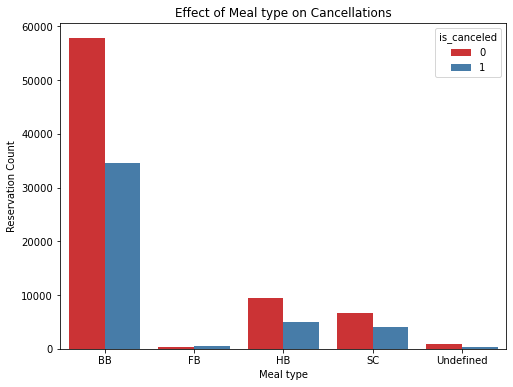

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x= 'meal', hue = 'is_canceled', palette= 'Set1')

plt.title ('Effect of Meal type on Cancellations')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')



This graph depict that more number of reservations are booked by the guest for "Bed & Breakfast" meal type

## How does the Price Per Night (ADR) Vary Over the Year by Hotel Type

Text(0.5, 1.0, 'Daily Rate by hotel type')

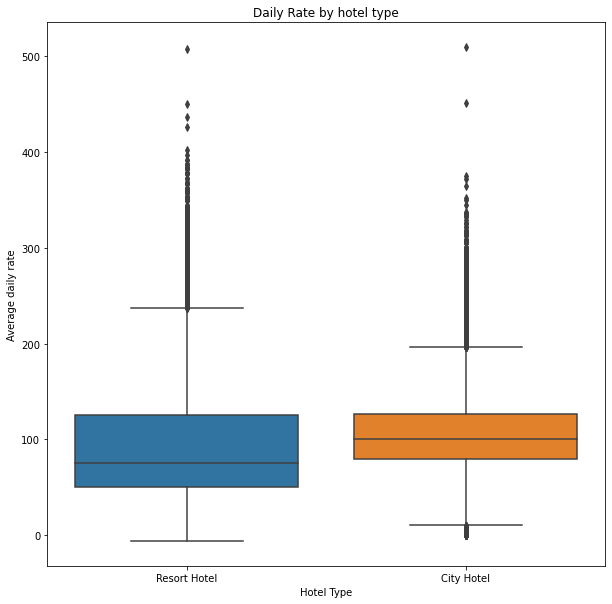

In [46]:
plt.figure(figsize=(10,10))
df2 = df.drop(df[df['adr']==5400].index, axis=0, inplace=False)  # Removed an extreme outlier (adr=5400) that made boxplot very squeezed to view
sns.boxplot(x='hotel', y='adr', data = df2)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")

Text(0.5, 1.0, 'Daily rate by hotel type')

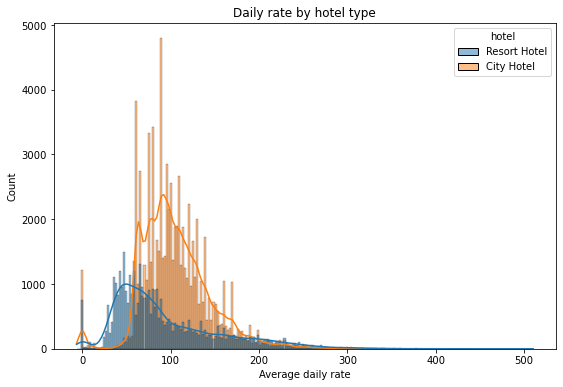

In [47]:
plt.figure(figsize=(9,6))
sns.histplot(x='adr', hue='hotel', data=df2, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

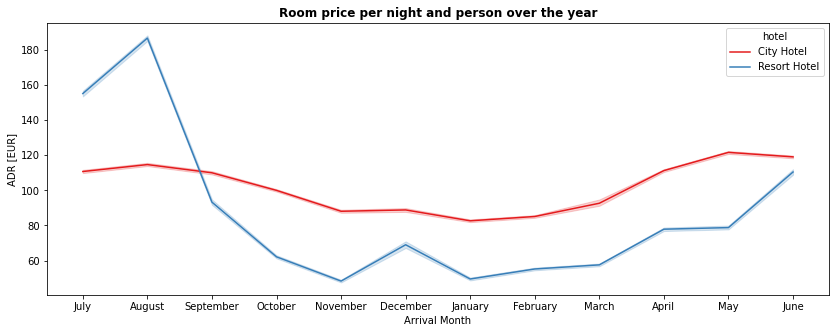

In [39]:
plt.figure(figsize=(14,5))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')

plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.ylabel("ADR [EUR]")
plt.show()


For Resort Hotel, the price per night (ADR) is more expensive during July, August & September For City Hotel, the price per night (ADR) is slightly more during March, April & May

## Relationship between Special Requests and Cancellations

Text(0.5, 1.0, 'Daily rate by customer type')

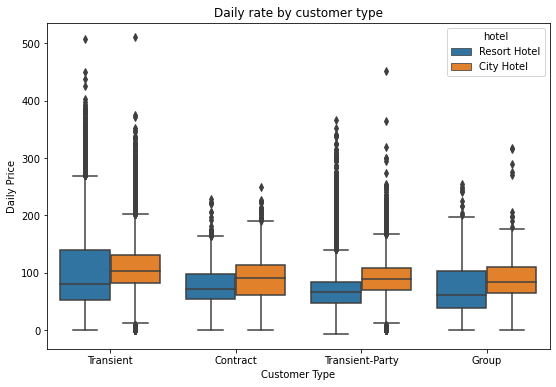

In [48]:
plt.figure(figsize=(9,6))
sns.boxplot(x='customer_type', y='adr', hue='hotel', data=df2)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

In [40]:
pd.crosstab(df['is_canceled'],df['total_of_special_requests'], normalize=True)

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,0.307915,0.217003,0.084622,0.017179,0.002546,0.000318
1,0.281062,0.061295,0.024005,0.003736,0.000302,0.000017


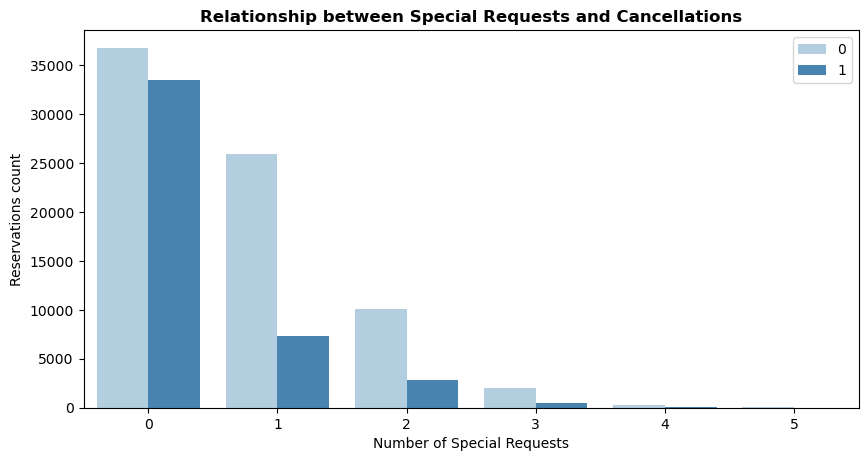

In [41]:
plt.figure(figsize = (10,5),dpi=100)
sns.countplot(data=df, x ="total_of_special_requests", hue = "is_canceled", palette= 'Blues')

plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

Conclusion - The Above graph depicts the relationship between total number of special requests and cancellation booking status. Around 28% of bookings were cancelled with no special requests from the guests followed by 6% bookings were cancelled with one special requests from the guests.

Text(0.5, 1.0, 'Bookings by market segment')

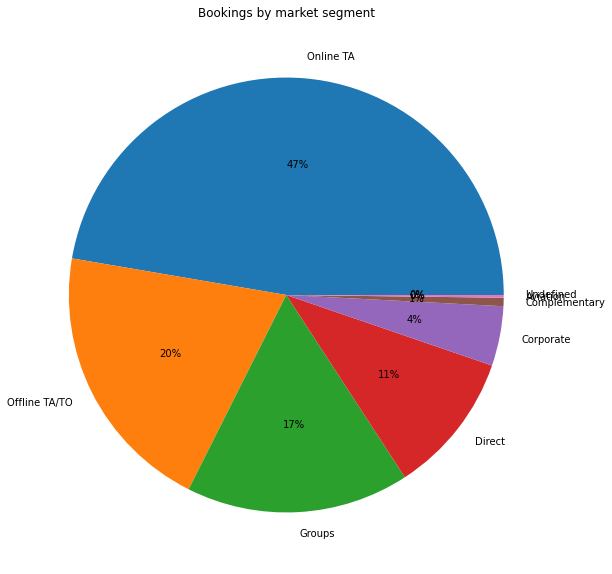

In [49]:
d = df['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")

Text(0.5, 1.0, 'Bookings by distribution channel')

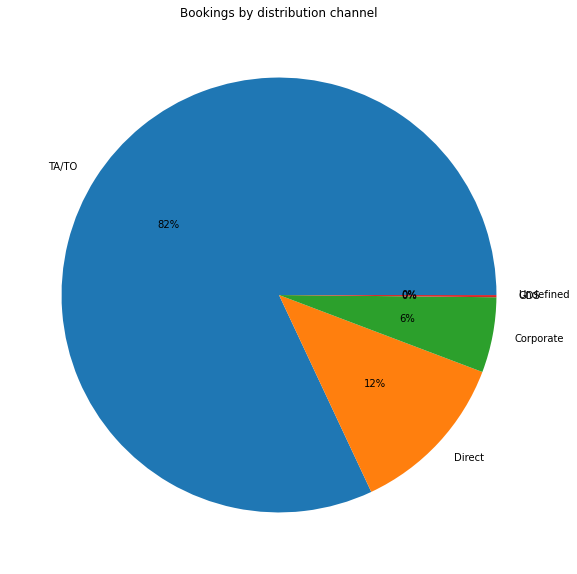

In [50]:
d = df['distribution_channel'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by distribution channel")

Text(0.5, 1.0, 'Portion of bookings with meals and its type')

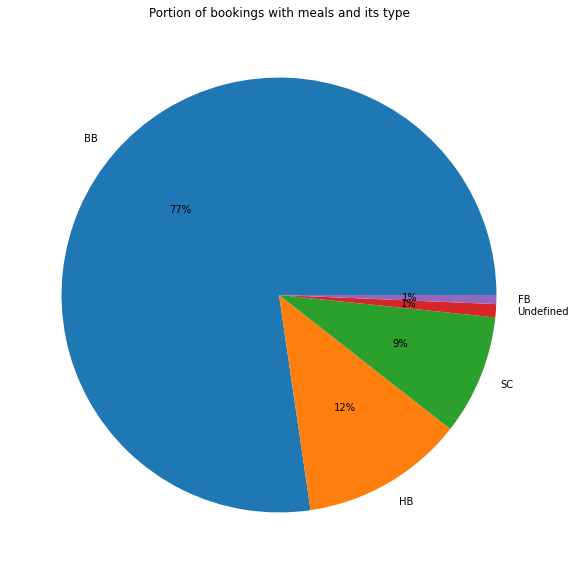

In [51]:
d = df['meal'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Portion of bookings with meals and its type")

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

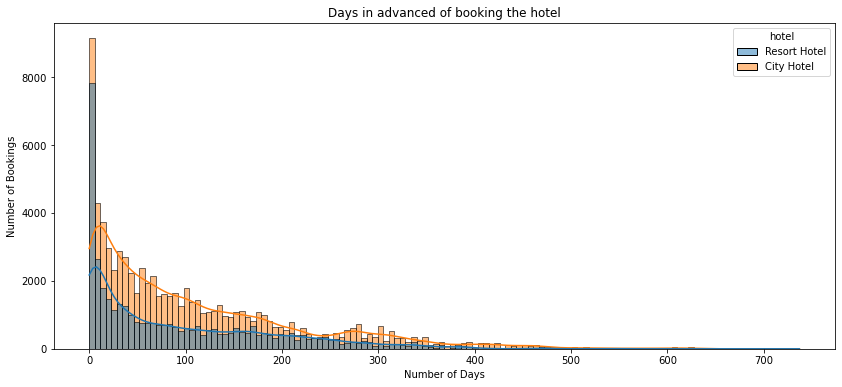

In [52]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='hotel', data=df2, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

Conclusion - Most of the bookings done were on the same day as it is shown in the graph that more than 8000 + bookings were done on the same day 
and this graph is declining with the number of days 

Text(0.5, 1.0, 'Top 50 countries by average number of special requests')

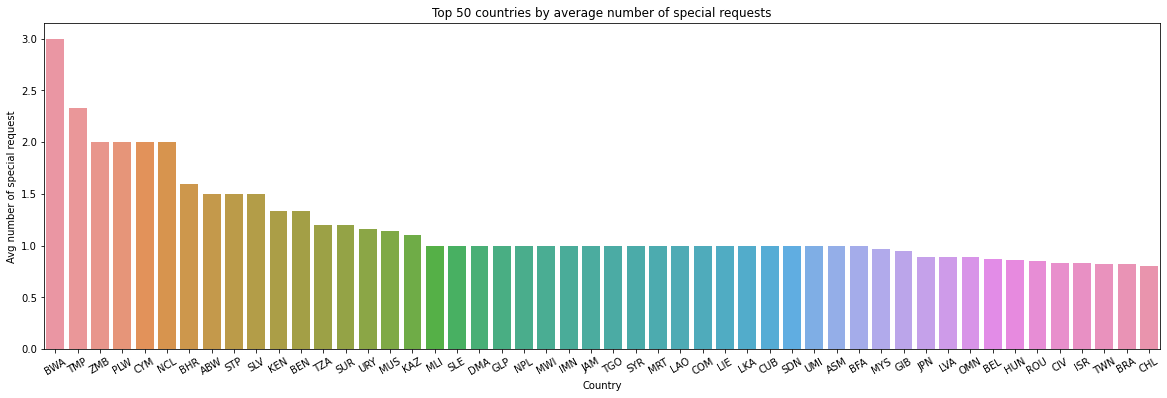

In [53]:
d = df.groupby("country")['total_of_special_requests'].mean().sort_values(ascending=False)[:50]
plt.figure(figsize=(20,6))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Avg number of special request")
plt.title("Top 50 countries by average number of special requests")

Conclusion - The most number of special request were made by (BWA) Country.

Text(0.5, 1.0, 'Average number of special requests by customer type')

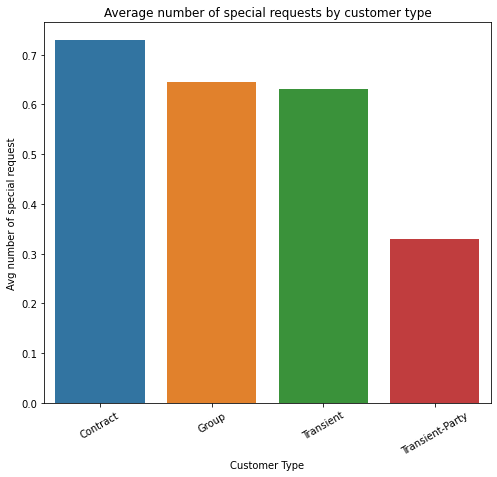

In [54]:
d = df.groupby("customer_type")['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Customer Type")
plt.ylabel("Avg number of special request")
plt.title("Average number of special requests by customer type")

Text(0.5, 1.0, 'Week Days stayed by different market segment')

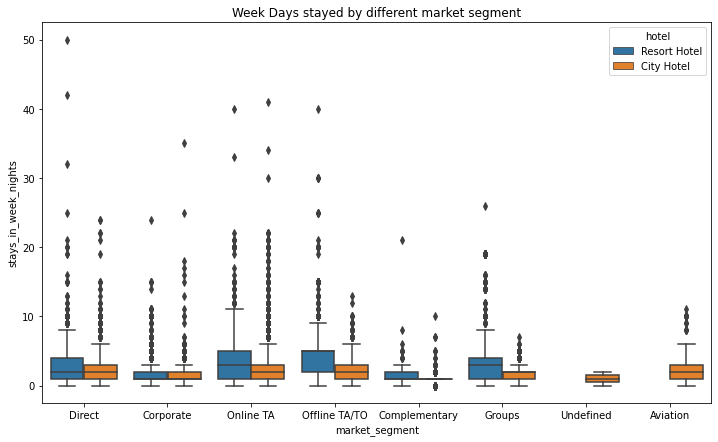

In [56]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", hue = "hotel", data = df)
plt.title("Week Days stayed by different market segment")